In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

THEME_COLORS = ["chocolate", "hotpink", "royalblue", "lime", "red", "olive", "orange", "yellow"]

In [18]:
yearly_performance_metrics = pd.read_csv("output/simulations_yearly_performance_metrics.csv")
yearly_performance_metrics

,id,n_assets,training_window,testing_window,n_tscv,tscv_size,tscv_metric,testing_metric,n_days,year,count,sharpe,annualized_mean,annualized_std
0,0,5,63,5,1,32,sharpe,sharpe,12600,2000,252,0.708825,0.130533,0.184154
1,0,5,63,5,1,32,sharpe,sharpe,12600,2001,248,-0.776331,-0.134360,0.173070
2,0,5,63,5,1,32,sharpe,sharpe,12600,2002,252,-0.869446,-0.195789,0.225188
3,0,5,63,5,1,32,sharpe,sharpe,12600,2003,252,1.550130,0.227400,0.146697
4,0,5,63,5,1,32,sharpe,sharpe,12600,2004,252,0.440489,0.050128,0.113801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123195,5599,30,504,252,8,756,sharpe,sharpe,12600,2017,251,2.606346,0.202622,0.077742
123196,5599,30,504,252,8,756,sharpe,sharpe,12600,2018,251,-0.737223,-0.118854,0.161219
123197,5599,30,504,252,8,756,sharpe,sharpe,12600,2019,252,1.690824,0.223087,0.131940
123198,5599,30,504,252,8,756,sharpe,sharpe,12600,2020,253,0.669976,0.245802,0.366882


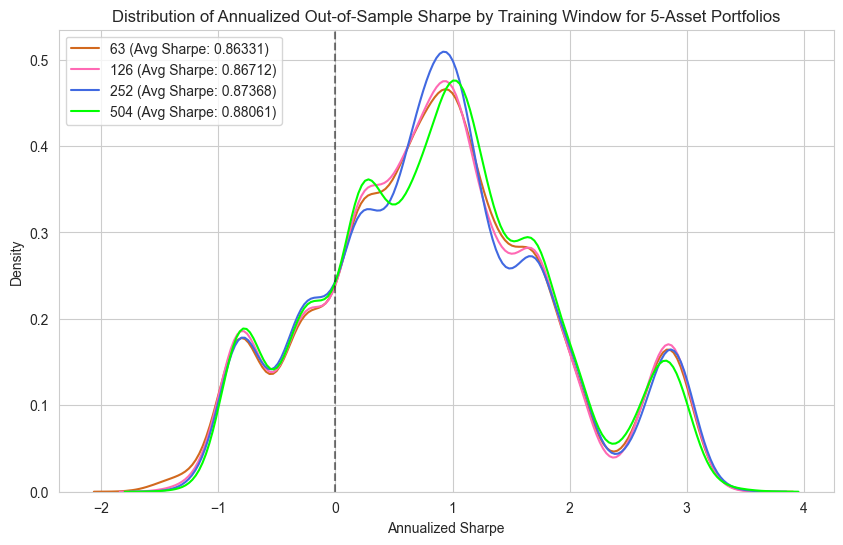

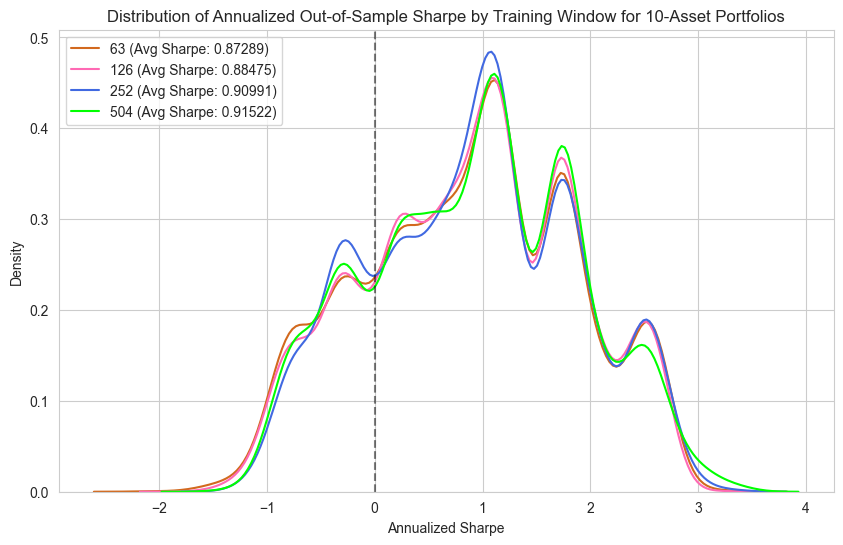

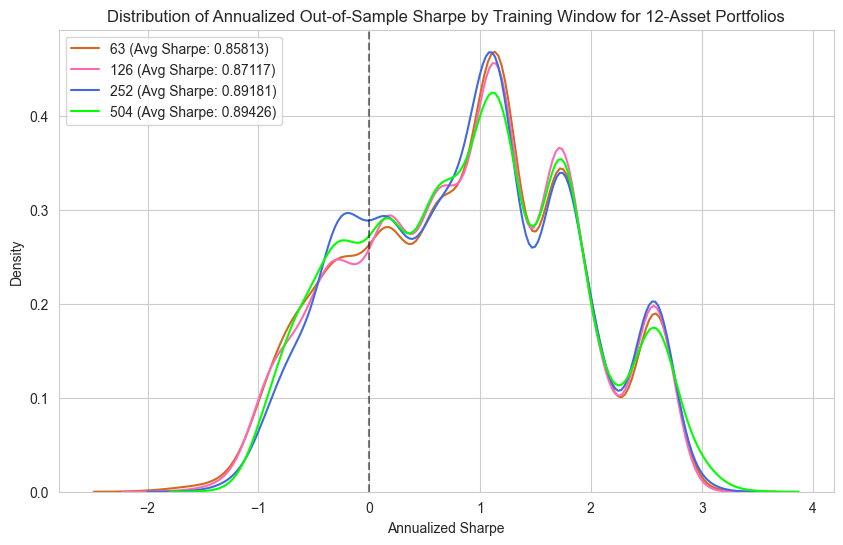

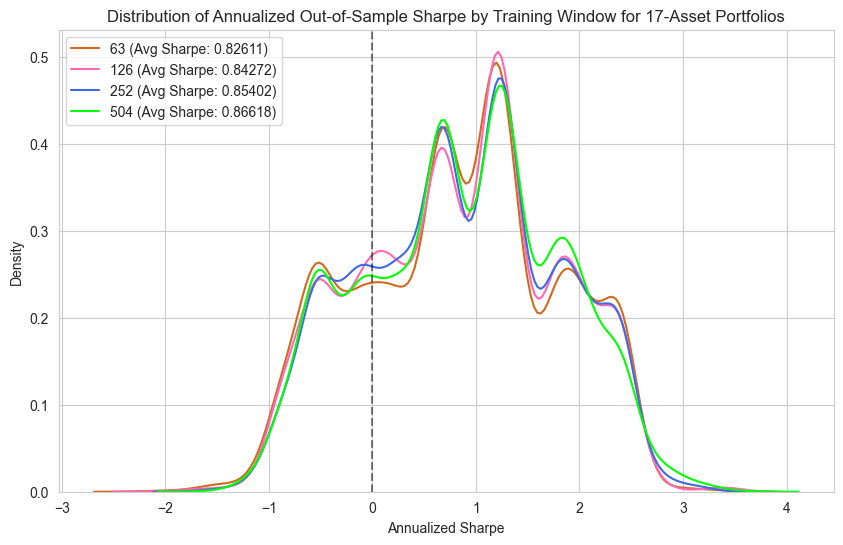

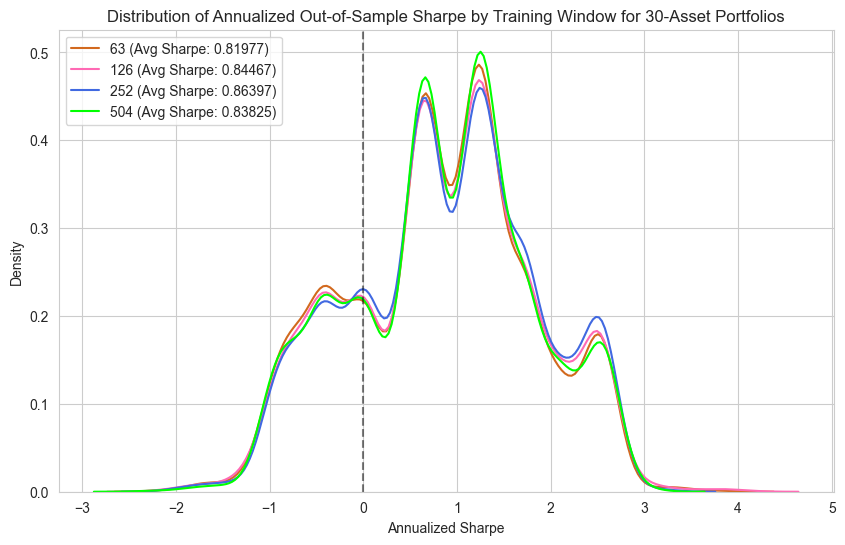

In [19]:

def plot_distribution(metric, metric_name):
    sns.set_style("whitegrid")
    for n_assets_chosen in yearly_performance_metrics['n_assets'].unique():
        filtered_yearly_performance_metrics = (
            yearly_performance_metrics
            .loc[lambda df: df["n_assets"] == n_assets_chosen]
        )
        fig, ax = plt.subplots(figsize=(10, 6))
        for color, metric_value in zip(THEME_COLORS, filtered_yearly_performance_metrics[metric].unique()):
            subset = filtered_yearly_performance_metrics[filtered_yearly_performance_metrics[metric] == metric_value]
            subset_mean = subset.sharpe.mean()
            sns.kdeplot(subset['sharpe'], label=f"{metric_value} (Avg Sharpe: {subset_mean:.5f})", ax=ax, color=color)
        ax.axvline(0, color='black', linestyle='--', alpha=.5)
        ax.set_title(f"Distribution of Annualized Out-of-Sample Sharpe by {metric_name} for {n_assets_chosen}-Asset Portfolios")
        ax.set_xlabel("Annualized Sharpe")
        ax.set_ylabel("Density")
        ax.legend(loc='upper left')
        plt.show()
plot_distribution("training_window", "Training Window")

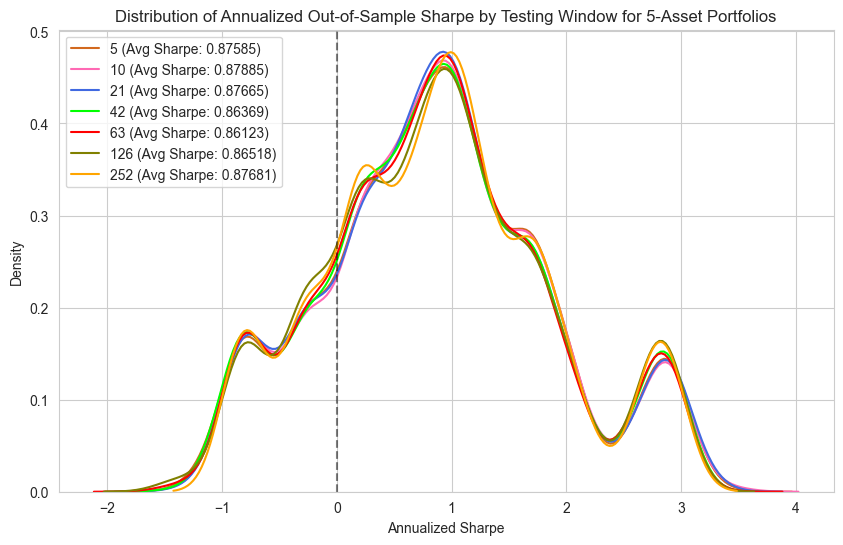

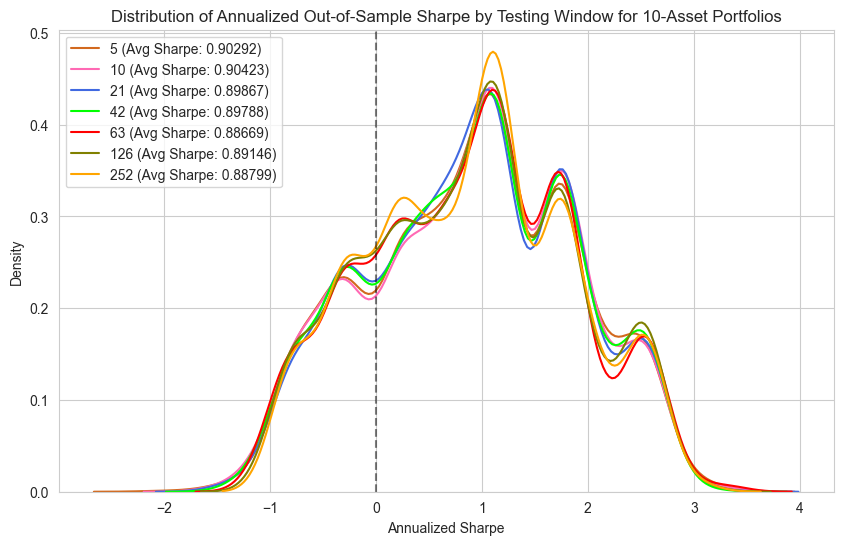

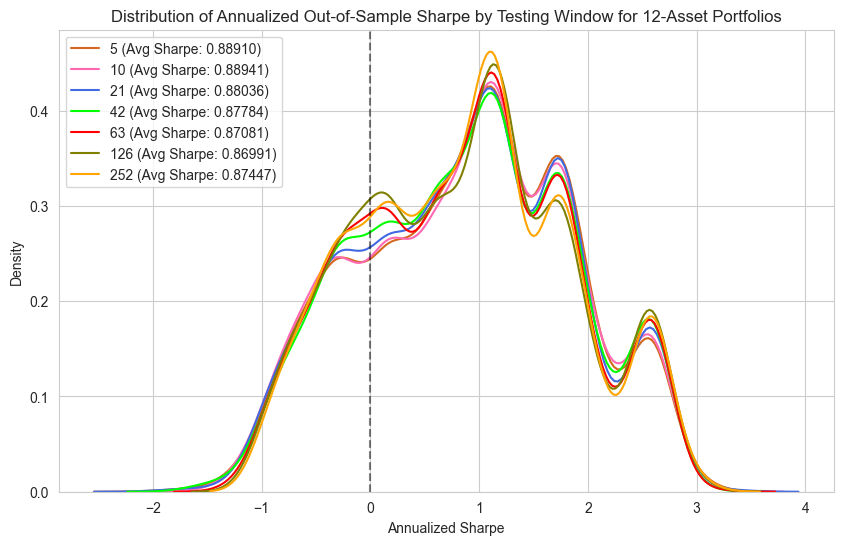

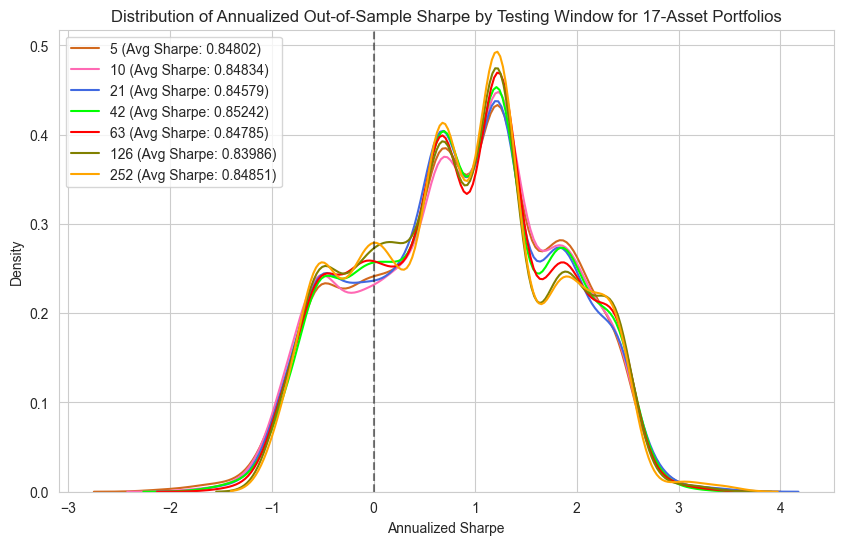

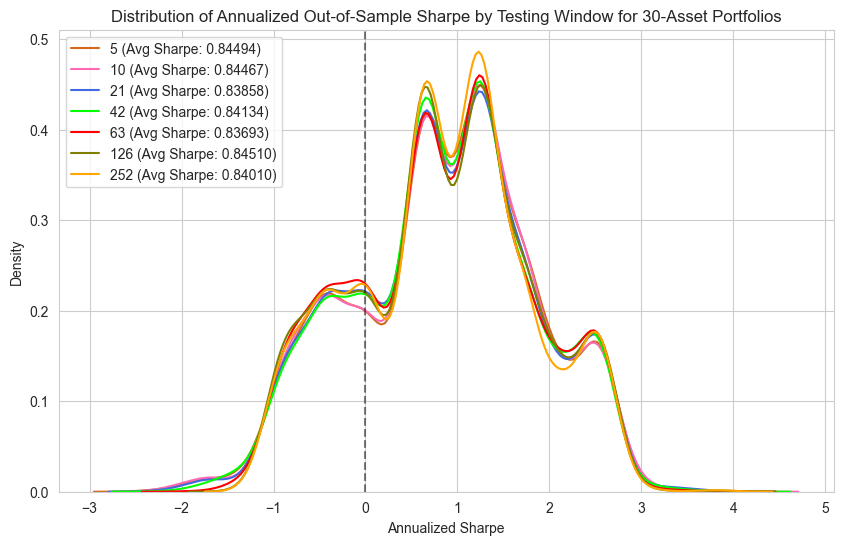

In [20]:
plot_distribution("testing_window", "Testing Window")

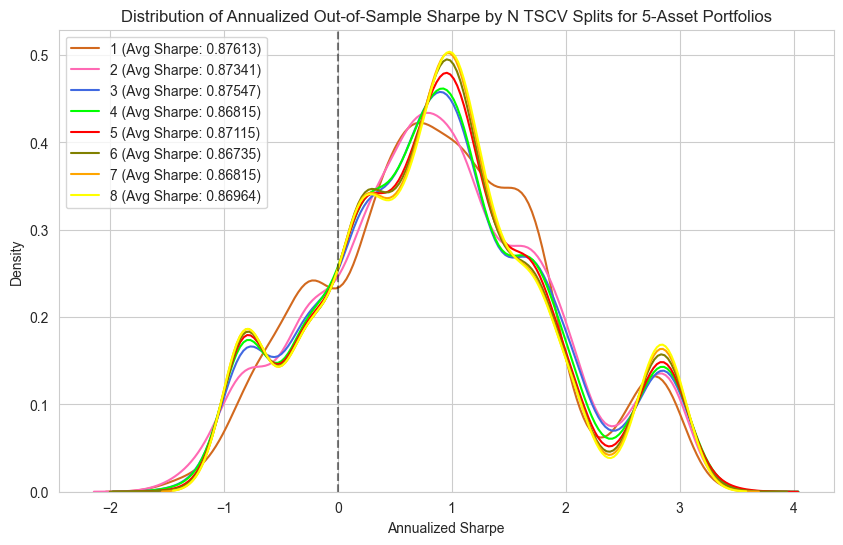

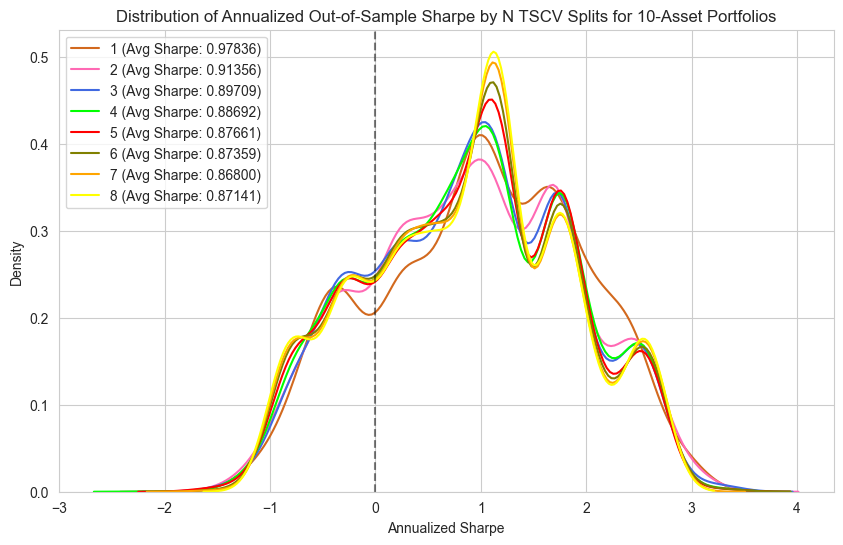

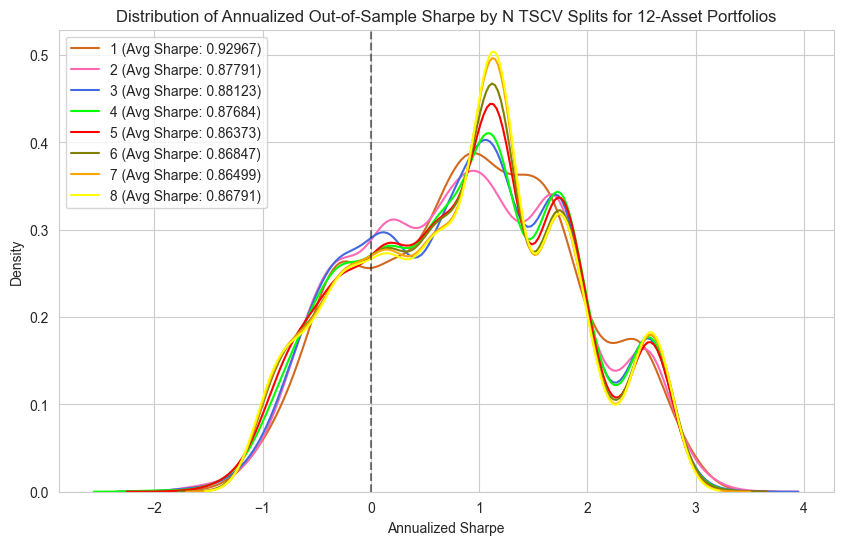

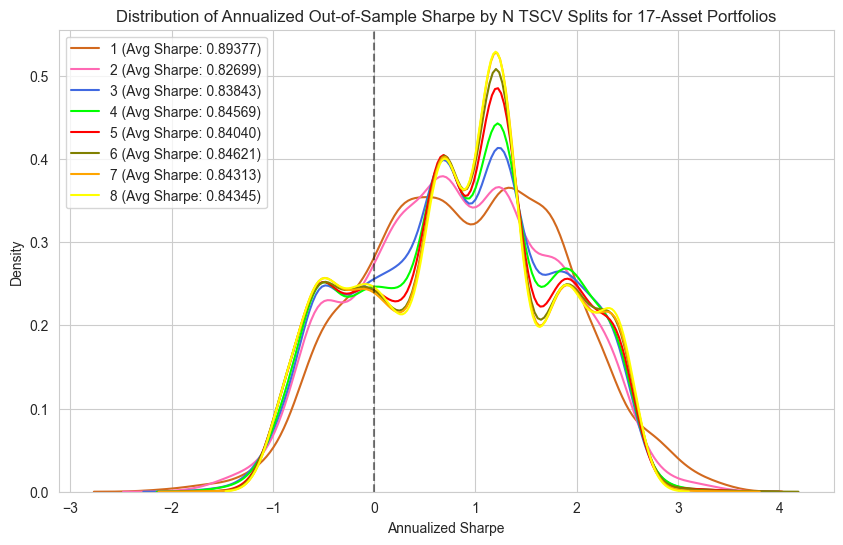

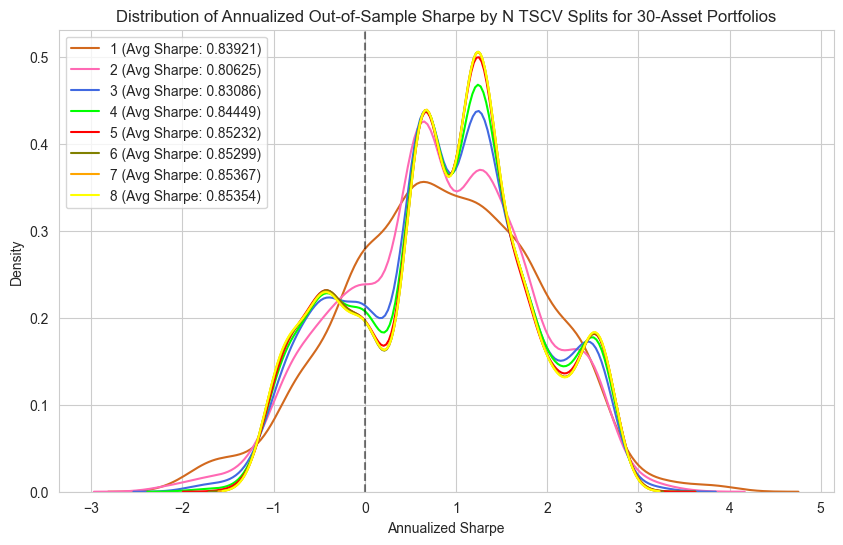

In [21]:
plot_distribution("n_tscv", "N TSCV Splits")